# **Resumo**

Após o pré-processamento realizado, iremos agora partir para a etapa de criação dos modelos de Machila Learning, determinação das métricas para cada modelo, otimização dos melhores modelos e por fim a criação do modelo final.



## **Importação das bibliotecas e ajustes globais**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.utils import resample
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline

from joblib import dump
import pickle

In [2]:
sns.set_style('darkgrid')
seed = 324551

## **Importações de funções próprias e determinação de diretório**

In [3]:
os.chdir("../Funcoes")
from func_classifier import Classifier
from pipelinehelper import PipelineHelper
os.chdir("../Notebooks")

## **Importação dos dados pré-processados**

In [4]:
df = pd.read_csv('../Dados/Dados_limpos/dados_preprocessados.csv')
df.head(3)

,AGE_ABOVE65,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,...,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,ICU,AGE_UNDER_30th,AGE_UNDER_50th,AGE_ABOVE_50th,AGE_ABOVE_80th
0,1,0,0,0,0,1,1,0,0,1,...,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,-0.603053,-0.764706,-1.0,-0.959596,-0.747001,1,1,1,0,0
2,0,0,0,0,0,0,0,0,1,1,...,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,0,0,1,0,0


## **Métricas Avaliativas e Modelos Utilizados**

As métricas escolhidas irão ajudar na decisão de qual modelo utilizar com base em sua performance. Serão usadas as seguintes métricas:

1.   ROC AUC
2.   F1 score
3.   Recall
4.   Precisão
5.   Acurácia

Os modelos escolhidos para análise foram:

|Modelo | Pacote |	Método|
|-------|--------|--------|
|LogisticRegression |	sklearn.linear_model |	Regressão Logística|
|DecisionTreeClassifier |	sklearn.tree 	| Árvore de decisão|
|RandomForestClassifier |	sklearn.ensemble |	Ensemble|
|ExtraTreesClassifier |	sklearn.ensemble |	Ensemble|

Para avaliar os medelos, iremos utilizar o ***DummyClassifier***, que irá "chutar" os resultados e usaremos como ***Baseline***.

## **Reamostragem**

Iremos inicialmente realizar uma reamostragem dos dados de forma a balancear a proporção de pacientes que necessitaram ou não de UTI entre os dados de treino e os dados de teste, evitando assim um undersampling ou oversampling.

In [5]:
df['ICU'].value_counts()

0    189
1    105
Name: ICU, dtype: int64

In [6]:
icu0 = df.query('ICU == 0')
icu1 = df.query('ICU == 1')
icu1_resample = resample(icu1,
                         n_samples=len(icu0),
                         random_state=seed)
df_resample = pd.concat([icu1_resample, icu0], axis=0)
df_resample['ICU'].value_counts()

1    189
0    189
Name: ICU, dtype: int64

Vemos agora que temos um dataset balanceado, com o mesmo número de pacientes que necessitaram ou não de UTI.

## Criação do Modelo DummyClassifier

In [7]:
dummy = Classifier(DummyClassifier, df_resample, strategy='most_frequent')
dummy.cross_val()


10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : DummyClassifier(random_state=324551, strategy='most_frequent')
----------------------------------------------------------------------------------
Métricas no dataset de teste:           
Intervalo de 95% da média            |   Média por classe
-------------------------------------|--------------------------------------------
ROC AUC MÉDIA      : 0.500 ± 0.000   |  
ACURÁCIA  MÉDIA    : 0.497 ± 0.001   |
-------------------------------------|--------------------------------------------
                      MÉDIA MACRO    |CLASSE 0  |CLASSE 1
----------------------------------------------------------------------------------
PRECISÃO  MÉDIA    : 0.249 ± 0.000   |0.498     |0.493    
RECALL MÉDIO       : 0.500 ± 0.000   |0.799     |0.196     
F1-SCORE  MÉDIO    : 0.332 ± 0.000   |0.614     |0.280    

TE

## **LogisticRegression**

In [8]:
lr = Classifier(LogisticRegression, df_resample, max_iter=5000)
lr.cross_val()


10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : LogisticRegression(max_iter=5000, random_state=324551)
----------------------------------------------------------------------------------
Métricas no dataset de teste:           
Intervalo de 95% da média            |   Média por classe
-------------------------------------|--------------------------------------------
ROC AUC MÉDIA      : 0.790 ± 0.011   |  
ACURÁCIA  MÉDIA    : 0.738 ± 0.012   |
-------------------------------------|--------------------------------------------
                      MÉDIA MACRO    |CLASSE 0  |CLASSE 1
----------------------------------------------------------------------------------
PRECISÃO  MÉDIA    : 0.741 ± 0.012   |0.735     |0.741    
RECALL MÉDIO       : 0.738 ± 0.012   |0.744     |0.732     
F1-SCORE  MÉDIO    : 0.737 ± 0.012   |0.740     |0.737    

TEMPO MÉDI

## **DecisionTreeClassifier**

In [9]:
dt = Classifier(DecisionTreeClassifier, df_resample)
dt.cross_val()


10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : DecisionTreeClassifier(random_state=324551)
----------------------------------------------------------------------------------
Métricas no dataset de teste:           
Intervalo de 95% da média            |   Média por classe
-------------------------------------|--------------------------------------------
ROC AUC MÉDIA      : 0.779 ± 0.014   |  
ACURÁCIA  MÉDIA    : 0.779 ± 0.014   |
-------------------------------------|--------------------------------------------
                      MÉDIA MACRO    |CLASSE 0  |CLASSE 1
----------------------------------------------------------------------------------
PRECISÃO  MÉDIA    : 0.790 ± 0.014   |0.831     |0.741    
RECALL MÉDIO       : 0.779 ± 0.014   |0.701     |0.857     
F1-SCORE  MÉDIO    : 0.777 ± 0.014   |0.760     |0.795    

TEMPO MÉDIO DE TREINA

## **RandomForestClassifier**

In [10]:
rf = Classifier(RandomForestClassifier, df_resample)
rf.cross_val()


10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : RandomForestClassifier(random_state=324551)
----------------------------------------------------------------------------------
Métricas no dataset de teste:           
Intervalo de 95% da média            |   Média por classe
-------------------------------------|--------------------------------------------
ROC AUC MÉDIA      : 0.942 ± 0.007   |  
ACURÁCIA  MÉDIA    : 0.844 ± 0.011   |
-------------------------------------|--------------------------------------------
                      MÉDIA MACRO    |CLASSE 0  |CLASSE 1
----------------------------------------------------------------------------------
PRECISÃO  MÉDIA    : 0.848 ± 0.010   |0.871     |0.821    
RECALL MÉDIO       : 0.844 ± 0.011   |0.808     |0.880     
F1-SCORE  MÉDIO    : 0.844 ± 0.011   |0.838     |0.850    

TEMPO MÉDIO DE TREINA

## **ExtraTreesClassifier**

In [11]:
et = Classifier(ExtraTreesClassifier, df_resample)
et.cross_val()


10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : ExtraTreesClassifier(random_state=324551)
----------------------------------------------------------------------------------
Métricas no dataset de teste:           
Intervalo de 95% da média            |   Média por classe
-------------------------------------|--------------------------------------------
ROC AUC MÉDIA      : 0.928 ± 0.008   |  
ACURÁCIA  MÉDIA    : 0.835 ± 0.012   |
-------------------------------------|--------------------------------------------
                      MÉDIA MACRO    |CLASSE 0  |CLASSE 1
----------------------------------------------------------------------------------
PRECISÃO  MÉDIA    : 0.837 ± 0.012   |0.831     |0.839    
RECALL MÉDIO       : 0.835 ± 0.012   |0.841     |0.829     
F1-SCORE  MÉDIO    : 0.835 ± 0.012   |0.836     |0.834    

TEMPO MÉDIO DE TREINAME

## **Análise das Métricas**

### **Curva ROC**

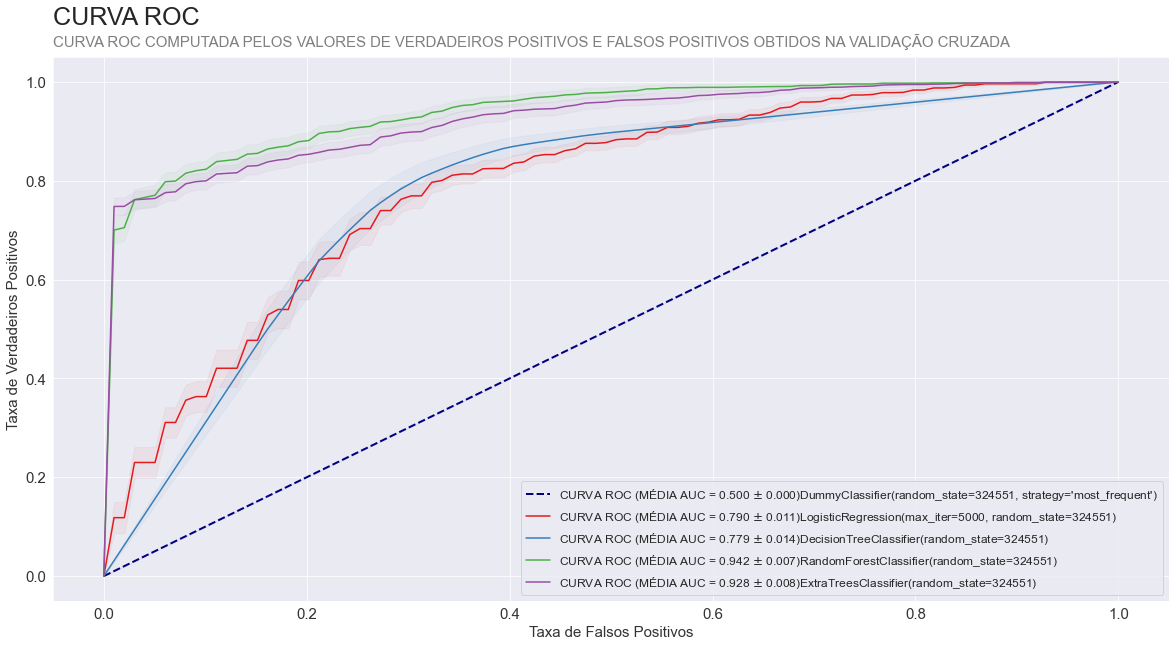

In [12]:
sns.set_palette(sns.color_palette('Set1'), 4)
ax = dummy.plot_roc_curve(color='navy', lw=2, linestyle='--')
lr.plot_roc_curve(ax=ax)
dt.plot_roc_curve(ax=ax)
rf.plot_roc_curve(ax=ax)
et.plot_roc_curve(ax=ax)
plt.show()

Com base na curva ROC, selecionamos os dois modelos com melhor resultado, sendo eles o **RandomForestClassifier** e o **ExtraTreesClassifier**.

## **Otimização dos Modelos Selecionados**

Para a otimização de modelos iremos utilizar o RandomizedSearchCV.

In [13]:
df_resample_shuffle = df_resample.sample(frac=1, random_state=seed).reset_index(drop=True)

X = df_resample_shuffle.drop('ICU', axis=1)
y = df_resample_shuffle['ICU']

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=seed)

In [14]:
pipe = Pipeline([
    ('feature_selection', PipelineHelper([
        ('rf',  SelectFromModel(RandomForestClassifier()))])),
    ('classifier', PipelineHelper([
        ('rf', RandomForestClassifier()),
        ('et', ExtraTreesClassifier())
    ])),
])

params = {
    'feature_selection__selected_model': pipe.named_steps['feature_selection'].generate({
        'rf__threshold': [0,  'median', 'mean', '1.25*mean'],
        'rf__estimator__random_state':[seed]
    }),
    'classifier__selected_model': pipe.named_steps['classifier'].generate({
        'rf__bootstrap':[True, False],
        'rf__max_depth': [None, 5, 10, 15,20],
        'rf__max_features' : [4, 'auto', 10],
        'rf__n_estimators': [100, 200, 400, 800],
        'rf__min_samples_split': [2, 3, 5],
        'rf__min_samples_leaf': [1, 2, 3],
        'rf__random_state' : [seed],
        'et__bootstrap':[True, False],
        'et__max_depth': [None, 5, 10, 15, 20],
        'et__n_estimators': [100, 200, 400, 800],
        'et__max_features' : [4, 'auto', 10],
        'et__min_samples_split': [2, 3, 5],
        'et__min_samples_leaf': [1, 2, 3],
        'et__random_state' : [seed]
    })
}

In [15]:
random_search = RandomizedSearchCV(pipe, params, n_jobs=-1, cv=cv, n_iter=100, scoring='f1_macro', verbose=1, random_state=seed)
random_search.fit(X,y)

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 3188 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 4038 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 4988 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  9.3min finished


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=324551),
                   estimator=Pipeline(steps=[('feature_selection',
                                              PipelineHelper(available_models={'rf': SelectFromModel(estimator=RandomForestClassifier())})),
                                             ('classifier',
                                              PipelineHelper(available_models={'et': ExtraTreesClassifier(),
                                                                               'rf': RandomForestClassifier()}))]),
                   n_iter=10...
                                                                         'random_state': 324551}), ...],
                                        'feature_selection__selected_model': [('rf',
                                                                               {'estimator__random_state': 324551,
                                                                            

In [16]:
print(f'Os parâmetros do modelo com o melhor resultado foram {random_search.best_params_}\n')
print(f'O melhor resultado para o F1 score foi de {random_search.best_score_}\n')
print(f'O melhor modelo foi {random_search.best_estimator_}')

Os parâmetros do modelo com o melhor resultado foram {'feature_selection__selected_model': ('rf', {'estimator__random_state': 324551, 'threshold': '1.25*mean'}), 'classifier__selected_model': ('rf', {'bootstrap': False, 'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 400, 'random_state': 324551})}

O melhor resultado para o F1 score foi de 0.8494767310454039

O melhor modelo foi Pipeline(steps=[('feature_selection',
                 PipelineHelper(available_models={'rf': SelectFromModel(estimator=RandomForestClassifier(random_state=324551),
                                                                        threshold='1.25*mean')},
                                selected_model=SelectFromModel(estimator=RandomForestClassifier(random_state=324551),
                                                               threshold='1.25*mean'))),
                ('classifier',
                 PipelineHelper(available_models={'et': ExtraTreesC

In [17]:
with open('../Modelos_preditivos/random_search_cv', 'wb') as random_search_file:
    pickle.dump(random_search, random_search_file) 

## **Modelo Final**

In [18]:
best_selection = random_search.best_estimator_['feature_selection'].selected_model 
best_selection

SelectFromModel(estimator=RandomForestClassifier(random_state=324551),
                threshold='1.25*mean')

In [19]:
best_classifier = random_search.best_estimator_['classifier'].selected_model 
best_classifier

RandomForestClassifier(bootstrap=False, max_depth=10, max_features=4,
                       min_samples_split=3, n_estimators=400,
                       random_state=324551)

In [20]:
best_pipeline = Pipeline([('feature_selection', best_selection),('classifier', best_classifier)])
best_pipeline

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=324551),
                                 threshold='1.25*mean')),
                ('classifier',
                 RandomForestClassifier(bootstrap=False, max_depth=10,
                                        max_features=4, min_samples_split=3,
                                        n_estimators=400,
                                        random_state=324551))])

In [21]:
best = Classifier(best_pipeline, df_resample)
best.cross_val()


10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=324551),
                                 threshold='1.25*mean')),
                ('classifier',
                 RandomForestClassifier(bootstrap=False, max_depth=10,
                                        max_features=4, min_samples_split=3,
                                        n_estimators=400,
                                        random_state=324551))])
----------------------------------------------------------------------------------
Métricas no dataset de teste:           
Intervalo de 95% da média            |   Média por classe
-------------------------------------|--------------------------------------------
ROC AUC MÉDIA      : 0.936 ± 0.009   |  
ACURÁCIA  MÉDIA    : 0

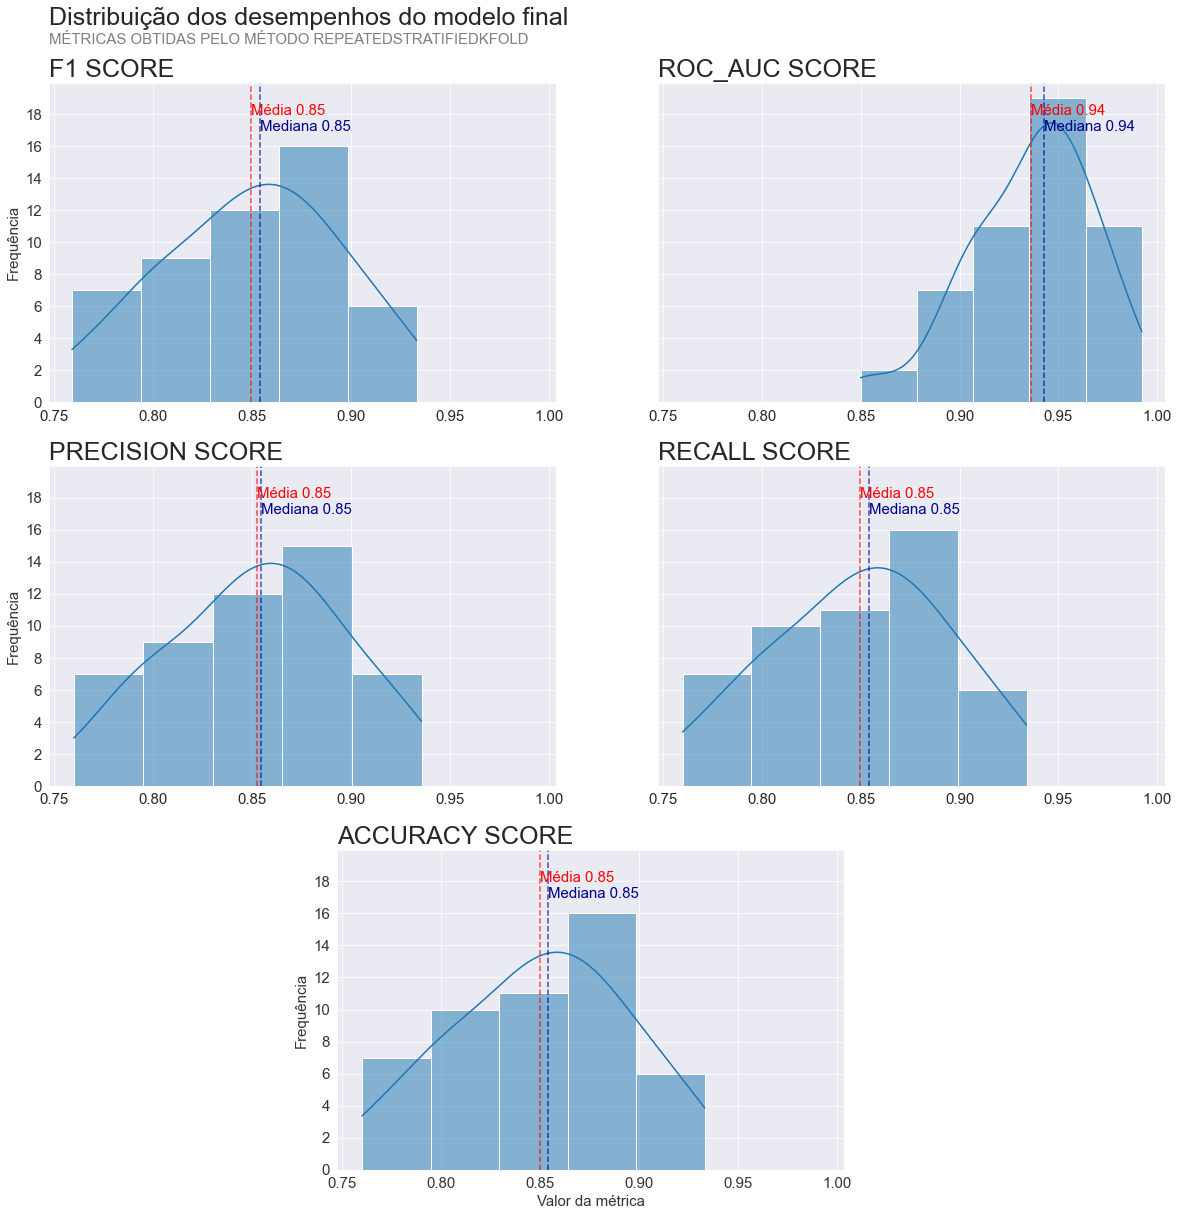

In [22]:
best.hist_metrics(kde=True, color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.5), 
                  name_estimator='final')
plt.show()

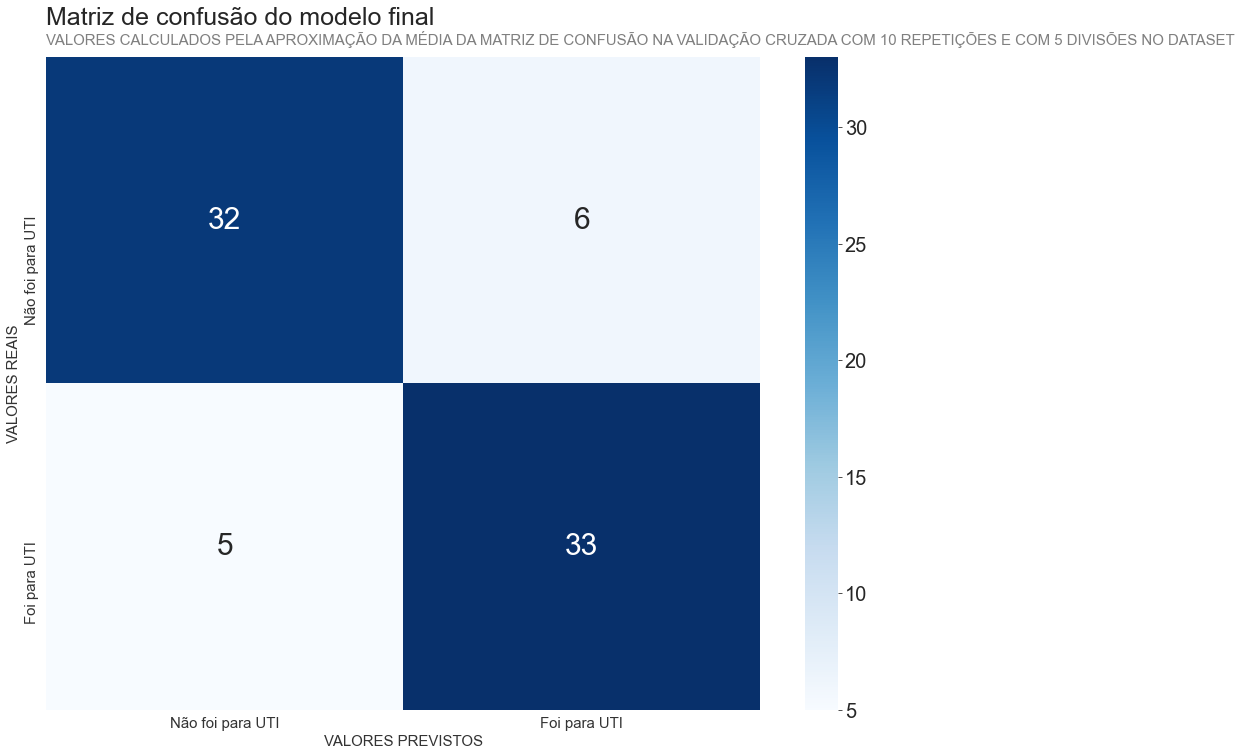

In [23]:
best.plot_confusion(name_estimator='final')
plt.show()

In [24]:
best.confusion_matrix_mean

array([[31.56,  6.24],
       [ 5.12, 32.68]])

## **Resultados**

O resultado das métricas obtidas no modelo escolhido foi:

|Métrica |	Média|
|--------| ------|
|ROC AUC |	0.936|
|ACURÁCIA |	0.882|
|PRECISÃO |	0.885|
|F1-SCORE |	0.882|
|RECALL |	0.882|

## **Salvando Modelo Final**

In [25]:
best_pipeline.fit(X, y)
dump(best_pipeline, '../Modelos_preditivos/Modelo_final.joblib')

['../Modelos_preditivos/Modelo_final.joblib']